Ajustar el código en que se estima el retraso promedio de la linea de espera para que se despliegue una grafica de escalon de los eventos.

[0.51785273 1.06466983 1.86481412 2.05367181 1.52194078 2.19984421
 0.61367859 1.02571508 0.48913438]


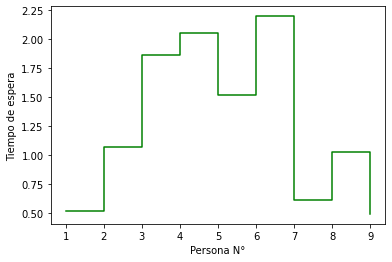

In [4]:
import random 
import math
import matplotlib.pyplot as plt 
import numpy as np

def p(x): # definimos nuestra función
    z = -(1/x)*math.log(random.random())
    return z

T = 10 # tiempo de simulacion total
pe = 1 
ps = 1.5
inf = 1000000
t = 0  # tiempo de simulacion actual
te = 0 # tiempo de espera
TE = []
TS = []
G = []
g = 0
ts = 0 # tiempo de servicio
ta = 0 # tiempo de arribo
c = 0
w = 0

while w == 0:
    te = p(pe)
    ts = p(ps)
    if c == 0:
        ts = inf
    ta = min(te, ts)
    
    if(ta == te):
        h = p(pe)
        t = t+h
        if(t>T):
            t = t-h
            w = 1
            break
        c = c+1
        TE.append(t)
        g = g+1
        G.append(g)
        # print("%.4f"%t,c)
        
    else:
        t = t+p(ps)
        c = c-1
        TS.append(t)
        #print("            %.4f"%t,c)
        
while c>0:
    t = t+p(ps)
    c = c-1
    TS.append(t)
    #print("              %.4f"%t,c)
    
R = np.subtract(TS,TE)
print(R)
plt.xlabel("Persona N°")
plt.ylabel("Tiempo de espera")
plt.step(G, R, where="post",color="green")
plt.show()